# Credit Card Fraud Detection
Problem Statement:The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not, so that customers are not charged for items that they did not purchase.

## Data Preparation and Preprocessing

In [ ]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install imblearn

In [ ]:
# Importing some more libraries.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from imblearn.over_sampling import SMOTE 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading credit card transaction dataset.
df=pd.read_csv("/content/drive/My Drive/project 5th sem/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# Showing number of rows and columns in the dataset.
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Showing number of null values.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Visualization

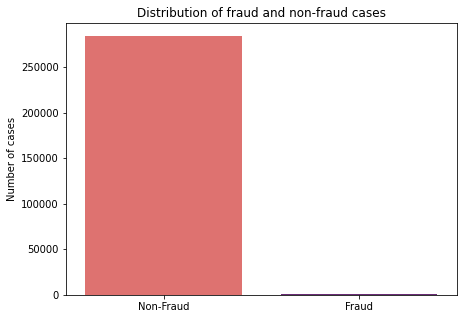

0    284315
1       492
Name: Class, dtype: int64


In [ ]:
plt.figure(figsize=(7,5))
fraud_or_not = df['Class'].value_counts()
plt.title('Distribution of fraud and non-fraud cases')
ax=sns.barplot(fraud_or_not.index,fraud_or_not, data=df, palette='magma_r')
ax.set(xticklabels=["Non-Fraud","Fraud"]);
ax.set_ylabel('Number of cases');
plt.show();
print(fraud_or_not)

In [ ]:
normal_count = len(df[df["Class"]==0]) # normal transaction are represented by 0
fraud_count = len(df[df["Class"]==1]) # fraud transaction are represented by 1
normal_transaction_percentage= normal_count/(normal_count+fraud_count)
print("Percentage of normal transacation: ",normal_transaction_percentage*100)
fraud_transaction_percentage= fraud_count/(normal_count+fraud_count)
print("Percentage of fraud transacation: ",fraud_transaction_percentage*100)

Percentage of normal transacation:  99.82725143693798
Percentage of fraud transacation:  0.1727485630620034


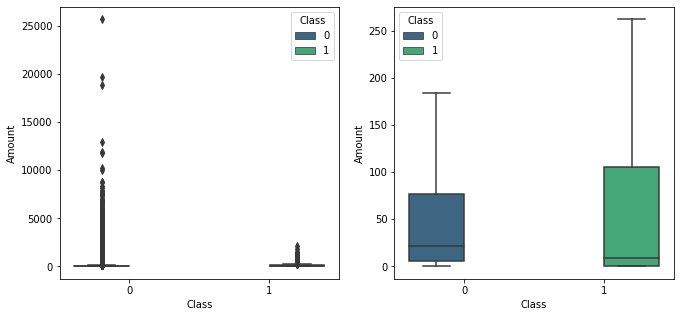

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(11,5))
# Showing data with outliers.
s = sns.boxplot(ax = axes[0], x="Class", y="Amount", hue="Class",data=df, palette="viridis",showfliers=True)
# Showing data without outliers.
s = sns.boxplot(ax = axes[1], x="Class", y="Amount", hue="Class",data=df, palette="viridis",showfliers=False)
plt.show();

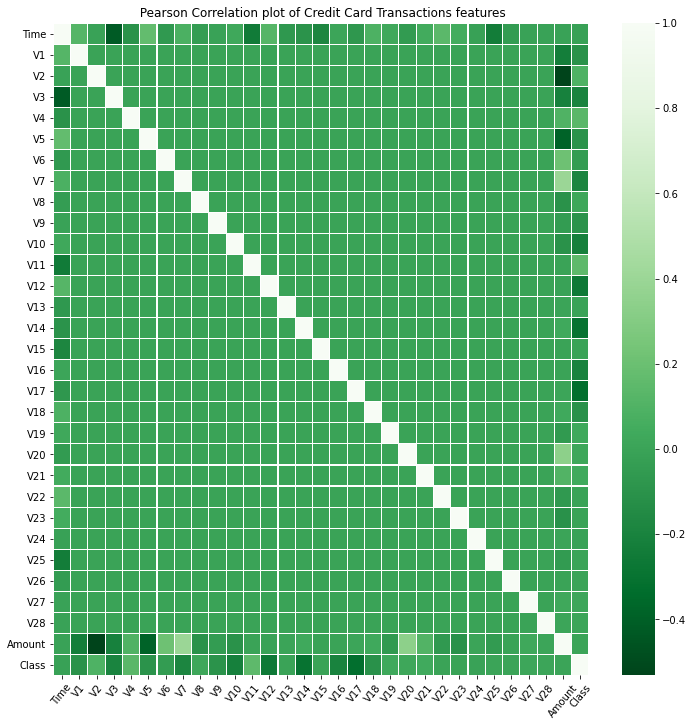

In [ ]:
plt.figure(figsize = (12,12))
plt.title(' Pearson Correlation plot of Credit Card Transactions features')
corr = df.corr()
ax=sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens_r")
ax.set_xticklabels(rotation=50,labels=corr.columns)
plt.show()

<Figure size 432x288 with 0 Axes>

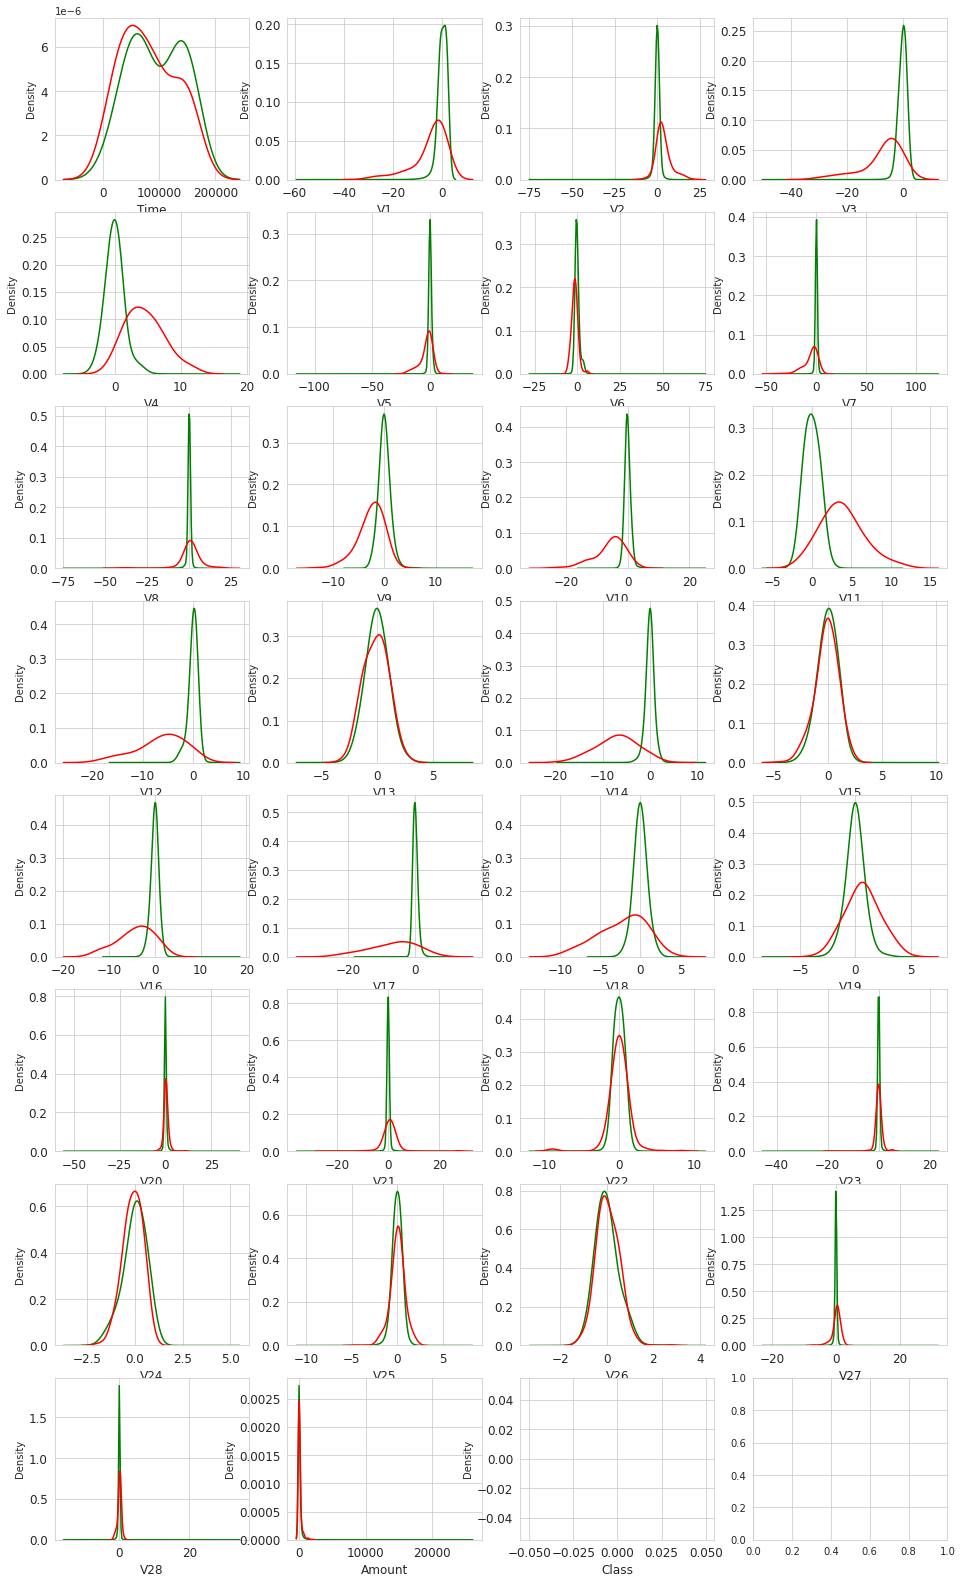

In [ ]:
col_val = df.columns.values
class0 = df.loc[df['Class'] == 0]
class1 = df.loc[df['Class'] == 1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28));
i=0
for val in col_val:
    i += 1
    plt.subplot(8,4,i);
    sns.kdeplot(class0[val], bw=0.5,label="Class = 0",color='green');
    sns.kdeplot(class1[val], bw=0.5,label="Class = 1",color='red');
    plt.xlabel(val, fontsize=12)
    locs,labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

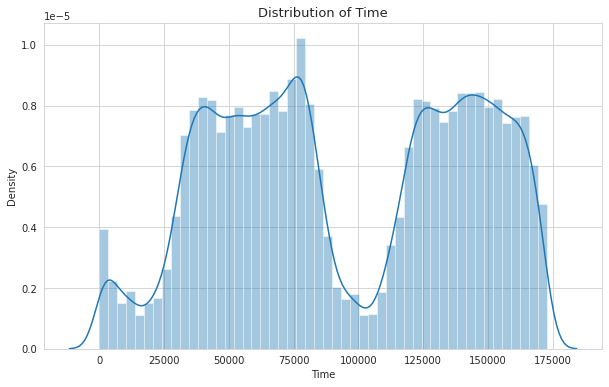

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(df['Time'])
ax.set_title('Distribution of Time', fontsize=13)
plt.show();

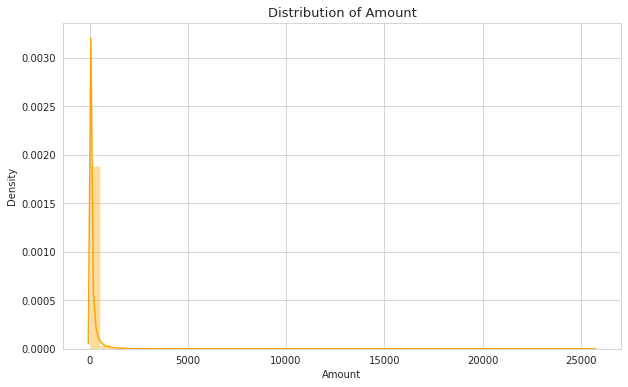

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(df['Amount'], color='orange')
ax.set_title('Distribution of Amount', fontsize=13)
plt.show();

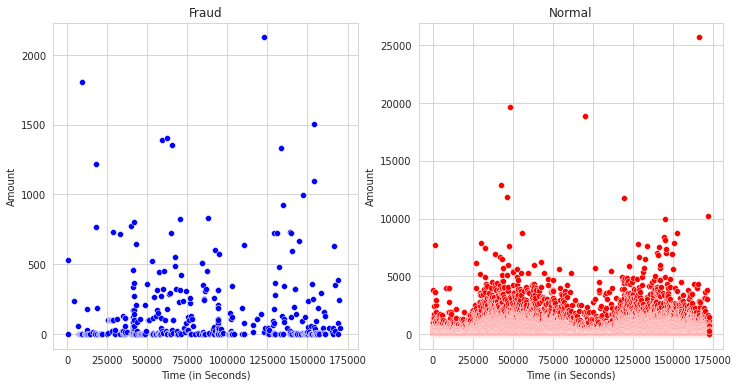

In [ ]:
f, ax = plt.subplots(1,2, sharex=True, figsize=(12,6))
sns.scatterplot(df.Time[df.Class == 1], df.Amount[df.Class == 1],ax=ax[0],color='blue')
ax[0].set_title('Fraud')
ax[0].set_ylabel('Amount')
ax[0].set_xlabel('Time (in Seconds)')
sns.scatterplot(df.Time[df.Class == 0], df.Amount[df.Class == 0],ax=ax[1],color='red')
ax[1].set_title('Normal')
ax[1].set_xlabel('Time (in Seconds)')
ax[1].set_ylabel('Amount')
plt.show()

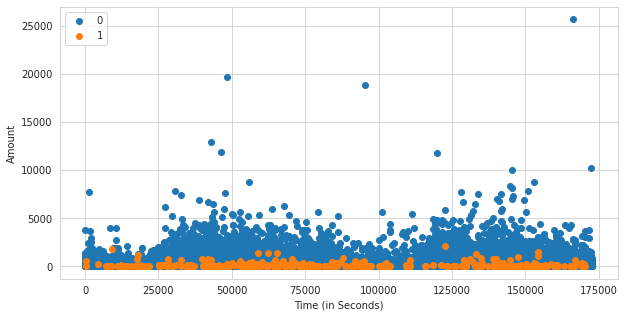

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter("Time","Amount",data=df[df.Class == 0])
plt.scatter("Time","Amount",data=df[df.Class == 1])
plt.legend(fraud_or_not.index)
plt.ylabel('Amount')
plt.xlabel('Time (in Seconds)');

In [ ]:
# Seperating dependent and independent attributes.
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
x

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Splitting of data into train and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Logistic Regression using SMOTE

In [ ]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
training_score = cross_val_score(classifier, x_train, y_train, cv=5)
print("Training score in", classifier.__class__.__name__, " : ", round(training_score.mean(), 2) * 100, "%")

Training score in LogisticRegression  :  100.0 %


In [ ]:
# Finding the best parameters using GridSearchCV
# Logistic Regression 
log_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log = GridSearchCV(LogisticRegression(), log_params)
grid_log.fit(x_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log.best_estimator_

In [ ]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, x_train, y_train, cv=5)
print('Cross Validation Score in Logistic Regression : ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Cross Validation Score in Logistic Regression :  99.92%


In [ ]:
classifier.fit(x_train, y_train.ravel()) 
predictions = classifier.predict(x_test) 
# Showing classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.55      0.65        98

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print("Number of Fraud transactions before OverSampling : {}".format(sum(y_train == 1))) 
print("Number of Non-Fraud transactions before OverSampling : {} \n".format(sum(y_train == 0))) 
# Using SMOTE Oversampling technique
sm = SMOTE(random_state = 2) 
x_train_new, y_train_new = sm.fit_sample(x_train, y_train.ravel()) 
  
print('Shape of x_train after Oversampling : {}'.format(x_train_new.shape)) 
print('Shape of y_train after OverSampling : {} \n'.format(y_train_new.shape)) 
  
print("Number of fraud transactions after OverSampling : {}".format(sum(y_train_new == 1))) 
print("Number of Non-Fraud transactions after OverSampling : {}".format(sum(y_train_new == 0)))

Number of Fraud transactions before OverSampling : 394
Number of Non-Fraud transactions before OverSampling : 227451 

Shape of x_train after Oversampling : (454902, 29)
Shape of y_train after OverSampling : (454902,) 

Number of fraud transactions after OverSampling : 227451
Number of Non-Fraud transactions after OverSampling : 227451


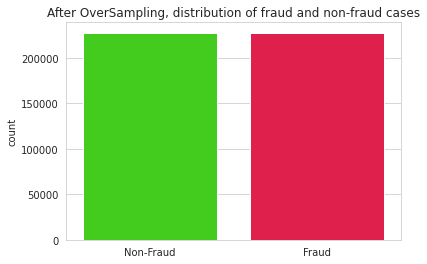

In [ ]:
plt.title('After OverSampling, distribution of fraud and non-fraud cases')
ax=sns.countplot(y_train_new, data=df, palette='prism')
ax.set(xticklabels=["Non-Fraud","Fraud"]);
plt.show();

In [ ]:
classifier2=LogisticRegression()
classifier2.fit(x_train_new, y_train_new.ravel()) 
predictions = classifier.predict(x_test) 
# Showing classification report after Oversampling
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.55      0.65        98

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



## Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(x_train, y_train.ravel())
pri = random_forest.predict(x_test)
print("Random Forest Classifier Accuracy Score\n",accuracy_score(y_test, pri)*100)

Random Forest Classifier Accuracy Score
 99.96137776061234


In [ ]:
# Showing the classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.55      0.65        98

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
rfc1= RandomForestClassifier(n_estimators=100,random_state=0)
rfc1.fit(x_train_new, y_train_new.ravel()) 
predictions = rfc1.predict(x_test)
# Showing the classification report after Oversampling
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print("Random Forest Classifier Accuracy Score After OverSampling\n",accuracy_score(y_test, predictions)*100)

Random Forest Classifier Accuracy Score After OverSampling
 99.95611109160492


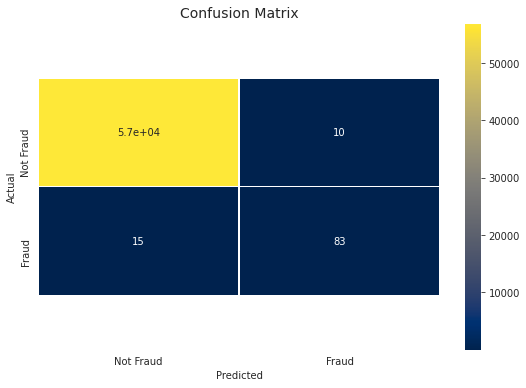

In [ ]:
Conf_Matrix = pd.crosstab(y_test,predictions, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(9,6))
ax=sns.heatmap(Conf_Matrix, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,linewidths=.2,cmap='cividis' )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', fontsize=14)
plt.show();